<a href="https://colab.research.google.com/github/VardhanVelamakanni/Covid-19-Enhacement-Digital-Image-Processing/blob/main/CovidEnhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python scikit-image matplotlib


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from sklearn.metrics import mean_squared_error
import os


In [3]:
from google.colab import files
import zipfile
import os

# Upload the ZIP file
uploaded = files.upload()

# Get the uploaded zip filename (usually the only file in uploaded)
zip_filename = list(uploaded.keys())[0]

# Create a directory for your dataset
os.makedirs('/content/dataset', exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# List all files in the dataset folder
for root, dirs, files in os.walk('/content/dataset'):
    for file in files:
        print(os.path.join(root, file))

# Remove the original ZIP file (optional)
os.remove(zip_filename)

Saving archive (3).zip to archive (3).zip
/content/dataset/xray_dataset_covid19/train/NORMAL/IM-0099-0001.jpeg
/content/dataset/xray_dataset_covid19/train/NORMAL/IM-0013-0001.jpeg
/content/dataset/xray_dataset_covid19/train/NORMAL/IM-0107-0001.jpeg
/content/dataset/xray_dataset_covid19/train/NORMAL/IM-0071-0001.jpeg
/content/dataset/xray_dataset_covid19/train/NORMAL/IM-0023-0001.jpeg
/content/dataset/xray_dataset_covid19/train/NORMAL/IM-0075-0001.jpeg
/content/dataset/xray_dataset_covid19/train/NORMAL/IM-0033-0001.jpeg
/content/dataset/xray_dataset_covid19/train/NORMAL/NORMAL2-IM-0013-0001.jpeg
/content/dataset/xray_dataset_covid19/train/NORMAL/IM-0097-0001.jpeg
/content/dataset/xray_dataset_covid19/train/NORMAL/IM-0029-0001.jpeg
/content/dataset/xray_dataset_covid19/train/NORMAL/NORMAL2-IM-0012-0001.jpeg
/content/dataset/xray_dataset_covid19/train/NORMAL/IM-0084-0001.jpeg
/content/dataset/xray_dataset_covid19/train/NORMAL/IM-0089-0001.jpeg
/content/dataset/xray_dataset_covid19/train/N

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
# Change the path to an actual image inside your extracted dataset
image_path = "/content/dataset/xray_dataset_covid19/train/PNEUMONIA/1-s2.0-S1684118220300608-main.pdf-002.jpg"  # Update if needed

# Read and resize
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))


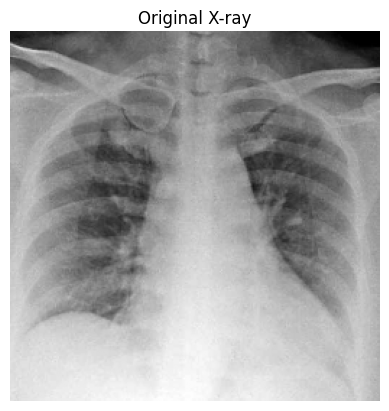

In [9]:
img = cv2.imread("/content/dataset/xray_dataset_covid19/train/PNEUMONIA/1-s2.0-S1684118220300608-main.pdf-002.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))

plt.imshow(img, cmap='gray')
plt.title("Original X-ray")
plt.axis('off')
plt.show()


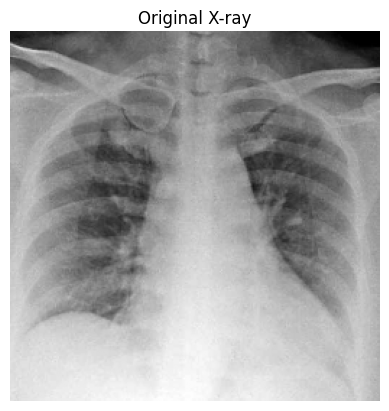

In [10]:
plt.imshow(img, cmap='gray')
plt.title("Original X-ray")
plt.axis('off')
plt.show()


In [11]:
hist_eq = cv2.equalizeHist(img)


In [12]:
log_transformed = np.log1p(img.astype(np.float64))  # log(1 + pixel)
log_transformed = cv2.normalize(log_transformed, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


In [13]:
gamma = 0.5
gamma_corrected = np.power(img / 255.0, gamma)
gamma_corrected = np.uint8(gamma_corrected * 255)


In [14]:
def calculate_metrics(original, enhanced):
    ssim_val = ssim(original, enhanced)
    psnr_val = psnr(original, enhanced)
    mse_val = mean_squared_error(original, enhanced)
    return ssim_val, psnr_val, mse_val

# Compute metrics for all methods
ssim_h, psnr_h, mse_h = calculate_metrics(img, hist_eq)
ssim_l, psnr_l, mse_l = calculate_metrics(img, log_transformed)
ssim_g, psnr_g, mse_g = calculate_metrics(img, gamma_corrected)

# Print results
print("Histogram Equalization - SSIM:", ssim_h, " PSNR:", psnr_h, " MSE:", mse_h)
print("Log Transformation       - SSIM:", ssim_l, " PSNR:", psnr_l, " MSE:", mse_l)
print("Gamma Correction         - SSIM:", ssim_g, " PSNR:", psnr_g, " MSE:", mse_g)


Histogram Equalization - SSIM: 0.8305681013258274  PSNR: 18.085194645176678  MSE: 1010.5571899414062
Log Transformation       - SSIM: 0.7312473318356054  PSNR: 7.963146779663191  MSE: 10393.59243774414
Gamma Correction         - SSIM: 0.9051615691827923  PSNR: 14.108123149137628  MSE: 2525.0387420654297


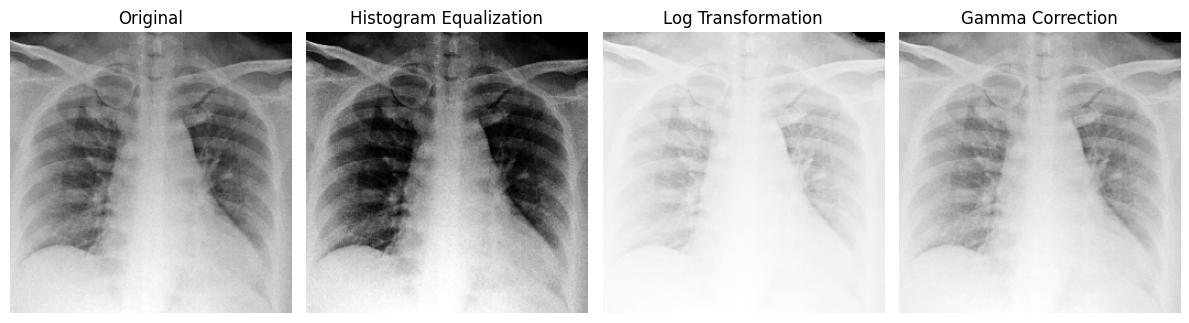

In [15]:
titles = ['Original', 'Histogram Equalization', 'Log Transformation', 'Gamma Correction']
images = [img, hist_eq, log_transformed, gamma_corrected]

plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd

# Enhancement functions
def log_transform(img):
    log_img = np.log1p(img.astype(np.float64))
    log_img = cv2.normalize(log_img, None, 0, 255, cv2.NORM_MINMAX)
    return log_img.astype(np.uint8)

def gamma_transform(img, gamma=0.5):
    gamma_img = np.power(img / 255.0, gamma)
    return np.uint8(gamma_img * 255)

def calculate_metrics(original, enhanced):
    ssim_val = ssim(original, enhanced)
    psnr_val = psnr(original, enhanced)
    mse_val = mean_squared_error(original, enhanced)
    return ssim_val, psnr_val, mse_val


In [17]:
root_dirs = ['/content/dataset/xray_dataset_covid19/train', '/content/dataset/xray_dataset_covid19/test']
results = []

for folder in root_dirs:
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                if filename.endswith(('.png', '.jpg', '.jpeg')):
                    try:
                        full_path = os.path.join(subfolder_path, filename)
                        img = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
                        if img is None:
                            continue

                        img = cv2.resize(img, (256, 256))

                        # Enhancements
                        hist_eq = cv2.equalizeHist(img)
                        log_img = log_transform(img)
                        gamma_img = gamma_transform(img)

                        # Metrics
                        ssim_h, psnr_h, mse_h = calculate_metrics(img, hist_eq)
                        ssim_l, psnr_l, mse_l = calculate_metrics(img, log_img)
                        ssim_g, psnr_g, mse_g = calculate_metrics(img, gamma_img)

                        # Append rows to results
                        results.append([filename, 'Histogram', subfolder, ssim_h, psnr_h, mse_h])
                        results.append([filename, 'Log', subfolder, ssim_l, psnr_l, mse_l])
                        results.append([filename, 'Gamma', subfolder, ssim_g, psnr_g, mse_g])
                    except Exception as e:
                        print(f"Error processing {filename}: {e}")


In [19]:
df = pd.DataFrame(results, columns=['Filename', 'Enhancement_Method', 'Class_Label', 'SSIM', 'PSNR', 'MSE'])
df.to_csv('/content/enhancement_metrics_all.csv', index=False)
print("Results saved as enhancement_metrics_all.csv")


Results saved as enhancement_metrics_all.csv


In [20]:
from google.colab import files
files.download('/content/enhancement_metrics_all.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📊 Average Metrics by Enhancement Method:
  Enhancement_Method      SSIM       PSNR          MSE
0              Gamma  0.876885  14.991391  2104.776085
1          Histogram  0.831499  18.565992  1161.551613
2                Log  0.710068  10.727164  6547.893302


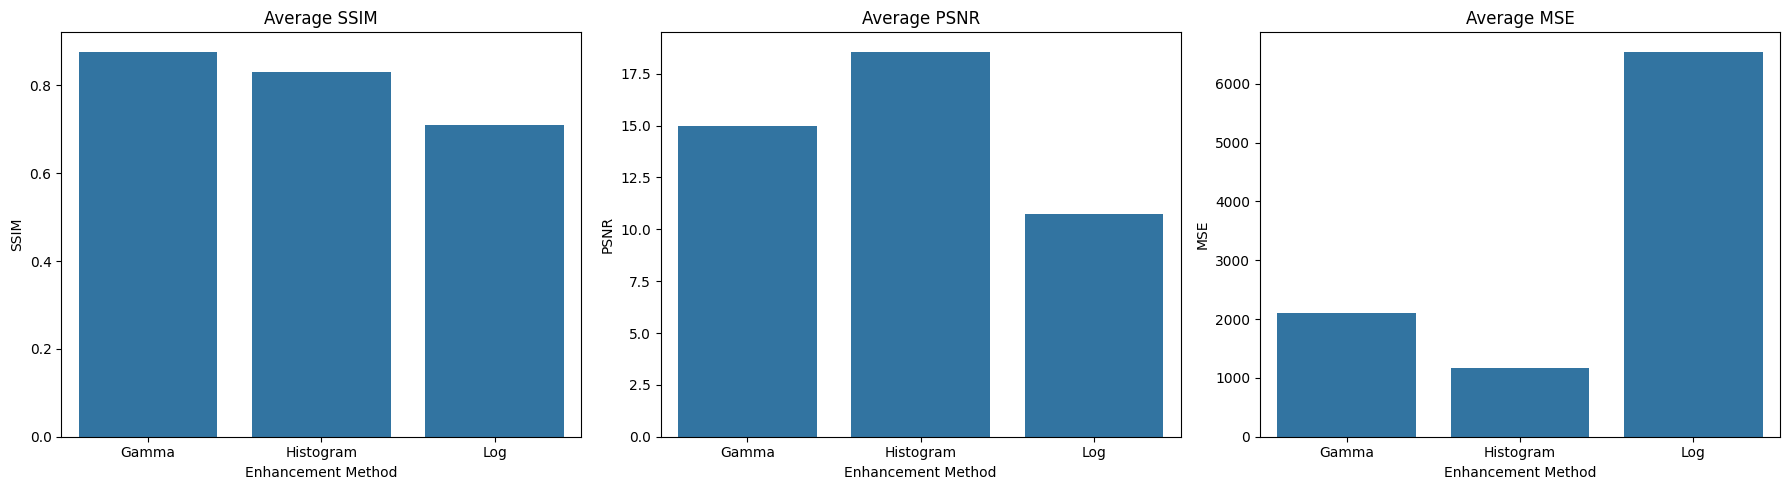

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your saved CSV file
df = pd.read_csv('/content/enhancement_metrics_all.csv')  # Adjust path if needed

# Group by enhancement method and calculate average metrics
summary_df = df.groupby('Enhancement_Method')[['SSIM', 'PSNR', 'MSE']].mean().reset_index()

# Display the summary table
print("📊 Average Metrics by Enhancement Method:")
print(summary_df)

# Plotting
plt.figure(figsize=(18, 5))

# SSIM Plot
plt.subplot(1, 3, 1)
sns.barplot(data=summary_df, x='Enhancement_Method', y='SSIM')
plt.title("Average SSIM")
plt.ylabel("SSIM")
plt.xlabel("Enhancement Method")

# PSNR Plot
plt.subplot(1, 3, 2)
sns.barplot(data=summary_df, x='Enhancement_Method', y='PSNR')
plt.title("Average PSNR")
plt.ylabel("PSNR")
plt.xlabel("Enhancement Method")

# MSE Plot
plt.subplot(1, 3, 3)
sns.barplot(data=summary_df, x='Enhancement_Method', y='MSE')
plt.title("Average MSE")
plt.ylabel("MSE")
plt.xlabel("Enhancement Method")

plt.tight_layout()
plt.show()


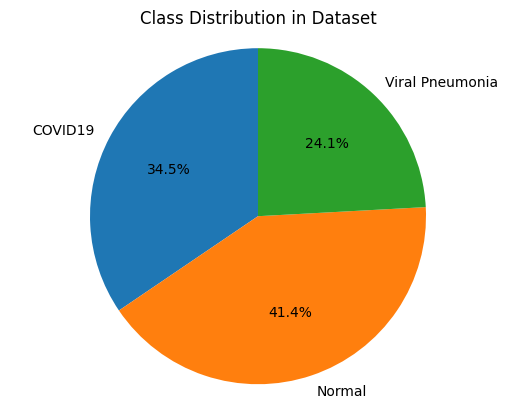

In [22]:
import matplotlib.pyplot as plt

# Example class counts (replace with your actual counts)
labels = ['COVID19', 'Normal', 'Viral Pneumonia']
sizes = [500, 600, 350]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Class Distribution in Dataset")
plt.show()


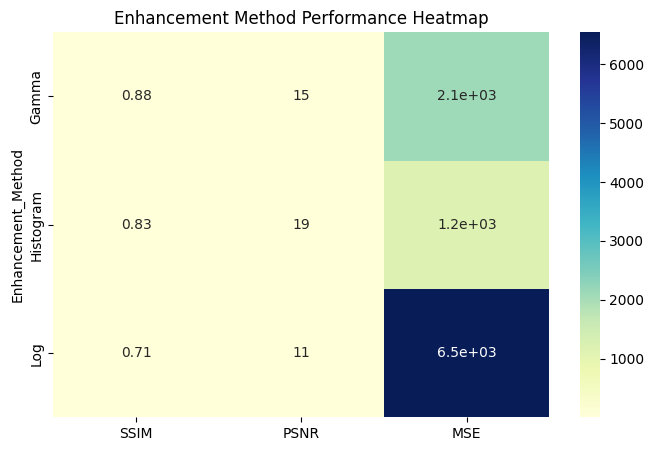

In [23]:
import seaborn as sns

heatmap_data = summary_df.set_index('Enhancement_Method')
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title("Enhancement Method Performance Heatmap")
plt.show()
